In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import string
import itertools
from PIL import Image
import random
random.seed(0)

In [2]:
alphabet = list(string.ascii_lowercase)
reps = [9,2,2,4,12,2,3,2,9,1,1,4,2,6,8,2,1,6,4,6,4,2,2,1,2,1]

In [3]:
actions = []
for i,r in enumerate(reps):
    actions = actions + [alphabet[i]]*reps[i]
random.shuffle(actions)

In [4]:
# Load tile for each action
tx = 20
im_list = []
for a in actions:
    im_list.append(np.asarray(Image.open('./tiles/%s.jpg'%a).resize((tx,tx))))
np.save('action_set',actions)

In [5]:
# Generate some random 3-6 letter words

Nwords = 15000

for ac in range(6,len(actions),5):
    words = []
    for j in range(Nwords):
        n_chars = np.random.randint(3,7)
        word = np.arange(len(actions[:ac]))
        np.random.shuffle(word)
        words = words + [word[:n_chars]]

    word_grid = np.zeros((Nwords,tx,tx*6,3),dtype=np.uint8)
    for i,word in enumerate(words):
        for k in range(word.shape[0]):
            word_grid[i,:,k*tx:(k+1)*tx,:] = im_list[word[k]] 

    np.save('./data/word_pics_%02d.npy'%ac,word_grid)
    np.save('./data/actions_%02d.npy'%ac,words)

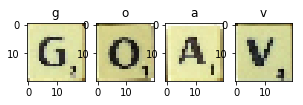

In [6]:
# sanity check
for i,letter in enumerate(words[0]):
    plt.subplot(1,5,i+1)
    plt.imshow(im_list[letter])
    plt.title(actions[letter])
plt.show()

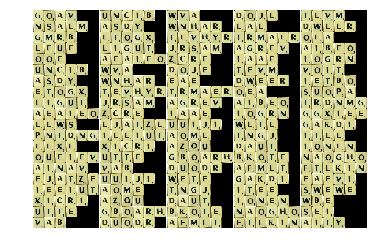

In [7]:
for j in range(5):
    plt.subplot(2,5,j+1)
    plt.imshow(word_grid[5*j:5*j+10,:,:,:].reshape(-1,6*20,3),aspect=1)
    plt.axis('off')
for j in range(5):
    plt.subplot(2,5,j+1+5)
    plt.imshow(word_grid[(50+5*j):(50+5*j+10),:,:,:].reshape(-1,6*20,3),aspect=1)
    plt.axis('off')
plt.subplots_adjust(hspace=0,wspace=0)
# plt.savefig('random_words.jpg')
plt.show()

In [18]:
sentence = ['panda','robot','learns','action','seqs','for', 'corl']
Test_words = []
for s in sentence:
    Test_words.append([actions.index(l) for l in s])

In [21]:
# Test words
#Test_words = [[67,0,53,13,1],[70,59,9,60,80],[47,17,0,70,53,76],[0,11,80,36,59,53],[76,17,69,77],[29,59,70],[11,59,70,47]]
# Test_words = [[30,0,26,6,1],[34,28,2,29,38],[22,8,0,34,26,36],[0,4,38,16,28,26],[36,8,32],[10,28,34],[4,28,34,22]]

test_word_grid = np.zeros((len(Test_words),tx,tx*6,3),dtype=np.uint8)
for i, word in enumerate(Test_words):
    for k in range(len(word)):
        test_word_grid[i,:,k*20:(k+1)*20,:] = im_list[word[k]] 
        
np.save('./data/test_word_pics.npy',test_word_grid)

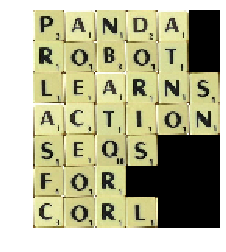

In [22]:
for j in range(5):
    plt.imshow(test_word_grid[:,:,:,:].reshape(-1,6*20,3))
    plt.axis('off')
plt.subplots_adjust(hspace=0,wspace=0)
# plt.savefig('test_words.jpg')
plt.show()